In [1]:
# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [3]:
# Import data & sort by temp

In [4]:
df = pd.read_csv('data/weather_data2.csv')
df_sorted = df.sort_values(by='temp', ascending=True)
df_sorted.to_csv('sorted_weather_data2.csv', index=False)

In [5]:
# Fill NaN values with average

In [6]:
mean_wind = df_sorted['wind_speed'].mean()
mean_layer = df_sorted['layer_count'].mean()

df_sorted['wind_speed'] = df_sorted['wind_speed'].fillna(mean_wind)
df_sorted['layer_count'] = df_sorted['layer_count'].fillna(mean_layer)

In [7]:
# Plot sorted data just for show

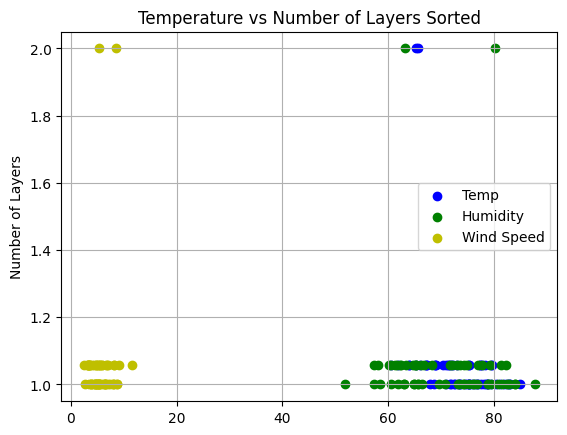

In [8]:
plt.scatter(df_sorted['temp'], df_sorted['layer_count'], marker='o', color='b', label='Temp')
# plt.plot(df_sorted['temp'], df_sorted['layer_count'], color='b')
plt.scatter(df_sorted['humidity'], df_sorted['layer_count'], marker='o', color='g', label='Humidity')
# plt.plot(df_sorted['humidity'], df_sorted['layer_count'], color='g')
plt.scatter(df_sorted['wind_speed'], df_sorted['layer_count'], marker='o', color='y', label='Wind Speed')
# plt.plot(df_sorted['wind_speed'], df_sorted['layer_count'], color='y')

plt.ylabel('Number of Layers')
plt.title('Temperature vs Number of Layers Sorted')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Make model

In [10]:
x = df_sorted[['temp', 'humidity', 'wind_speed']].values
y = df_sorted['layer_count'].values

reg = linear_model.LinearRegression()
reg.fit(x, y)

print("Coeficient(s):", reg.coef_)
print("Intercept:", reg.intercept_)

Coeficient(s): [-0.01072145  0.00104423  0.00862773]
Intercept: 1.7262790517733353


In [11]:
# Simple prediction

In [12]:
curr_temp = 76
curr_humidity = 40
curr_wind_speed = 5

prediction = reg.predict([[curr_temp, curr_humidity, curr_wind_speed]])

print(f"You should wear {prediction} layers if its {curr_temp} °F outside, with {curr_humidity} Humididy and {curr_wind_speed} Mph winds" )

You should wear [0.99635685] layers if its 76 °F outside, with 40 Humididy and 5 Mph winds


In [13]:
# Make general y prediction

In [14]:
temp_range = np.linspace(df_sorted['temp'].min(), df_sorted['temp'].max(), 100)
humidity_mean = df_sorted['humidity'].mean()
wind_speed_mean = df_sorted['wind_speed'].mean()

# Build input with fixed humidity and wind speed
x_values = np.column_stack([temp_range, 
                            np.full_like(temp_range, humidity_mean), 
                            np.full_like(temp_range, wind_speed_mean)])

y_pred = reg.predict(x_values)

In [15]:
# Display general y prediction

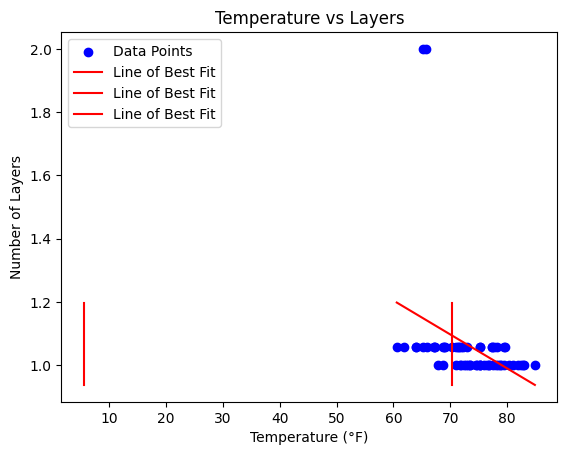

In [16]:
plt.scatter(df_sorted['temp'], df_sorted['layer_count'], color='blue', label='Data Points')
plt.plot(x_values, y_pred, color='red', label='Line of Best Fit')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Layers')
plt.legend()
plt.title('Temperature vs Layers')
plt.show()